#   Assignment 2 Data wrangling using Pandas

In [1]:
import numpy as np
import pandas as pd

# 1. Write a regular expression to convert the data in a structured o/p (sample o/p shown below) 
#Use this regular expression to read the data using pandas read_csv function.

In [2]:
data = pd.read_csv('access_log_Jul95.txt', sep=" ", header=None)
data.head(5)

,0,1,2,3,4,5,6,7
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


In [3]:
#If required that you ignore blank columns Manually label the columns as shown in the sample output below
#replace [ in timestamp
data[3] = data[3].str.replace('[','',regex=True)
#drop extra columns
data.drop(data.columns[[1,2,4]],axis=1,inplace=True)
#rename column names
data.columns = ["host", "time", "request_type", "response","size"]
#split by first space only
data[['request_type','url']] = data['request_type'].str.split(' ',n=1,expand=True)
#rearrange columns
data = data[["host", "time", "request_type", "url", "response","size"]]
data.head(5)

,host,time,request_type,url,response,size
0,199.72.81.55,01/Jul/1995:00:00:01,GET,/history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,01/Jul/1995:00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200,4085
3,burger.letters.com,01/Jul/1995:00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,01/Jul/1995:00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200,4179


# 2.Identify number of requests for each hour and plot the same using line plot. Use the following instructions 
#Convert the data type of time column to datetime using pd.to_datetime() with appropriate time  format 

In [4]:
data['time'] =  pd.to_datetime(data['time'], format='%d/%b/%Y:%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host          91714 non-null  object        
 1   time          91714 non-null  datetime64[ns]
 2   request_type  91714 non-null  object        
 3   url           91714 non-null  object        
 4   response      91714 non-null  int64         
 5   size          91714 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
data.head(5)

,host,time,request_type,url,response,size
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200,4085
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200,4179


In [6]:
#    Use resample function to identify number of requests per hour and plot the same using line plot 

In [7]:
data['Number'] = 1
data.head(5)

,host,time,request_type,url,response,size,Number
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200,6245,1
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200,3985,1
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200,4085,1
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304,0,1
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200,4179,1


In [8]:
data1 = data.resample('1H', on='time').sum()
data1.drop('response',axis=1,inplace=True)
data1.head(5)

,Number
time,
1995-07-01 00:00:00,3565
1995-07-01 01:00:00,3004
1995-07-01 02:00:00,2268
1995-07-01 03:00:00,1734
1995-07-01 04:00:00,1482


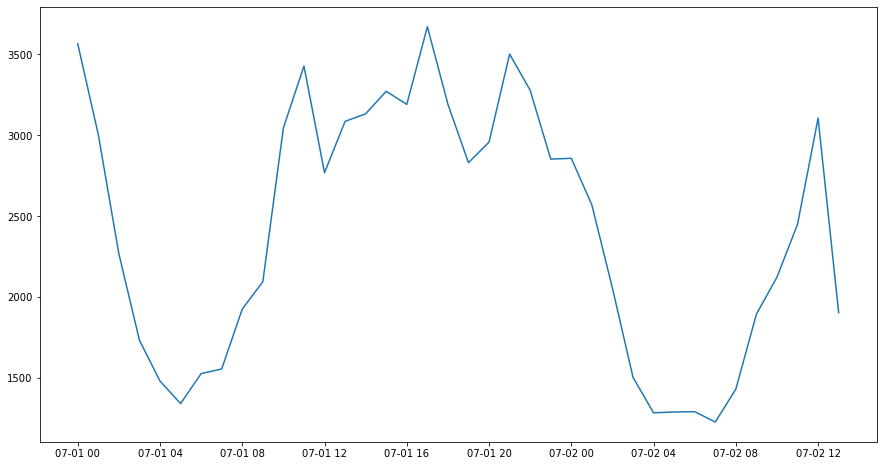

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(data1.index,data1.Number)
plt.show()

#    Interpret the chart and identify from which hour of the day, the number of page visits increases 


As seen from chart number of page visits start increasing in-between 7 A.M & 8 A.M.

# 3.Identify different types of `request_type` along with their frequencies 

In [10]:
data.groupby(['request_type']).sum()['Number']

request_type
GET     91639
HEAD       74
POST        1
Name: Number, dtype: int64

# 4.Analyze `size` column using the following instruction 

#Convert `size` column to numeric (Remove special characters, if necessary)    

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host          91714 non-null  object        
 1   time          91714 non-null  datetime64[ns]
 2   request_type  91714 non-null  object        
 3   url           91714 non-null  object        
 4   response      91714 non-null  int64         
 5   size          91714 non-null  object        
 6   Number        91714 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 4.9+ MB


In [12]:
#data['size'] = data['size'].str.replace('-','',regex=True)
#data.loc[data['size'] == '', 'size'] = 0

In [13]:
data['size'] = pd.to_numeric(data['size'],errors='coerce')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host          91714 non-null  object        
 1   time          91714 non-null  datetime64[ns]
 2   request_type  91714 non-null  object        
 3   url           91714 non-null  object        
 4   response      91714 non-null  int64         
 5   size          90788 non-null  float64       
 6   Number        91714 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 4.9+ MB


In [15]:
#Using pd.cut, divide `size` column in to 10 bins. 

In [16]:
data['size_bins'] = pd.cut(x=data['size'], bins=10)

In [17]:
data.head(5)

,host,time,request_type,url,response,size,Number,size_bins
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200,6245.0,1,"(-1646.592, 164659.2]"
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200,3985.0,1,"(-1646.592, 164659.2]"
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200,4085.0,1,"(-1646.592, 164659.2]"
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304,0.0,1,"(-1646.592, 164659.2]"
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200,4179.0,1,"(-1646.592, 164659.2]"


In [18]:
#Identify the bin which has the maximum count 

In [19]:
data.groupby(['size_bins']).sum()['Number'].sort_values(ascending=False)

size_bins
(-1646.592, 164659.2]     88554
(164659.2, 329318.4]       1283
(823296.0, 987955.2]        373
(493977.6, 658636.8]        205
(987955.2, 1152614.4]       173
(329318.4, 493977.6]        147
(1152614.4, 1317273.6]       34
(658636.8, 823296.0]         17
(1481932.8, 1646592.0]        2
(1317273.6, 1481932.8]        0
Name: Number, dtype: int64

# 5.Using `url` column, create a new column `file_type` based on following conditions 
    If the `url` ends with either `.gif` or `.jpg`, `file_type` will be `image` 
    If the `url` ends with `.html`, `file_type` will be `html` 
    Else `file_type` will be `Other` 
    Identify how many times images were rendered 

In [20]:
url_type = {".gif":"image",".jpg": "image",".html":"html"}

def check_ext(x):
    for key in url_type:
        if key.lower() in x.lower():
            return url_type[key]
    return 'Other'

data["file_type"] = data["url"].map(lambda x: check_ext(x))

In [21]:
data.head(5)

,host,time,request_type,url,response,size,Number,size_bins,file_type
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200,6245.0,1,"(-1646.592, 164659.2]",Other
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200,3985.0,1,"(-1646.592, 164659.2]",Other
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200,4085.0,1,"(-1646.592, 164659.2]",html
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304,0.0,1,"(-1646.592, 164659.2]",html
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200,4179.0,1,"(-1646.592, 164659.2]",image


In [22]:
data[data['file_type']=='image']['Number'].sum()

50704